In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('../code')

from diusst_eulera import diusst_eulera
from diusst_eulerb import diusst_eulerb
from diusst_eulerc import diusst_eulerc

from simu_eulera import simulate_eulera
from simu_eulerb import simulate_eulerb
from simu_eulerc import simulate_eulerc


from mscfunctions import *
from interpolation import *

In [41]:
Ap = [1e-4,5e-3,3]
Bp = [4e-4,5e-3,3]
Cp = [2e-4,5e-3,3,0.7,1]
Dp = [2e-4,5e-3,3,0.7,10]
A = simulate_eulera(Ap,windcos=0,windstrength=0)
B = simulate_eulerb(Bp,windcos=0,windstrength=0)
C = simulate_eulerc(Cp,windcos=0,windstrength=0)
D = simulate_eulerc(Dp,windcos=0,windstrength=0)

Done, took  0.4430971145629883
Done, took  0.5504601001739502
Done, took  0.5353004932403564
Done, took  0.5391240119934082


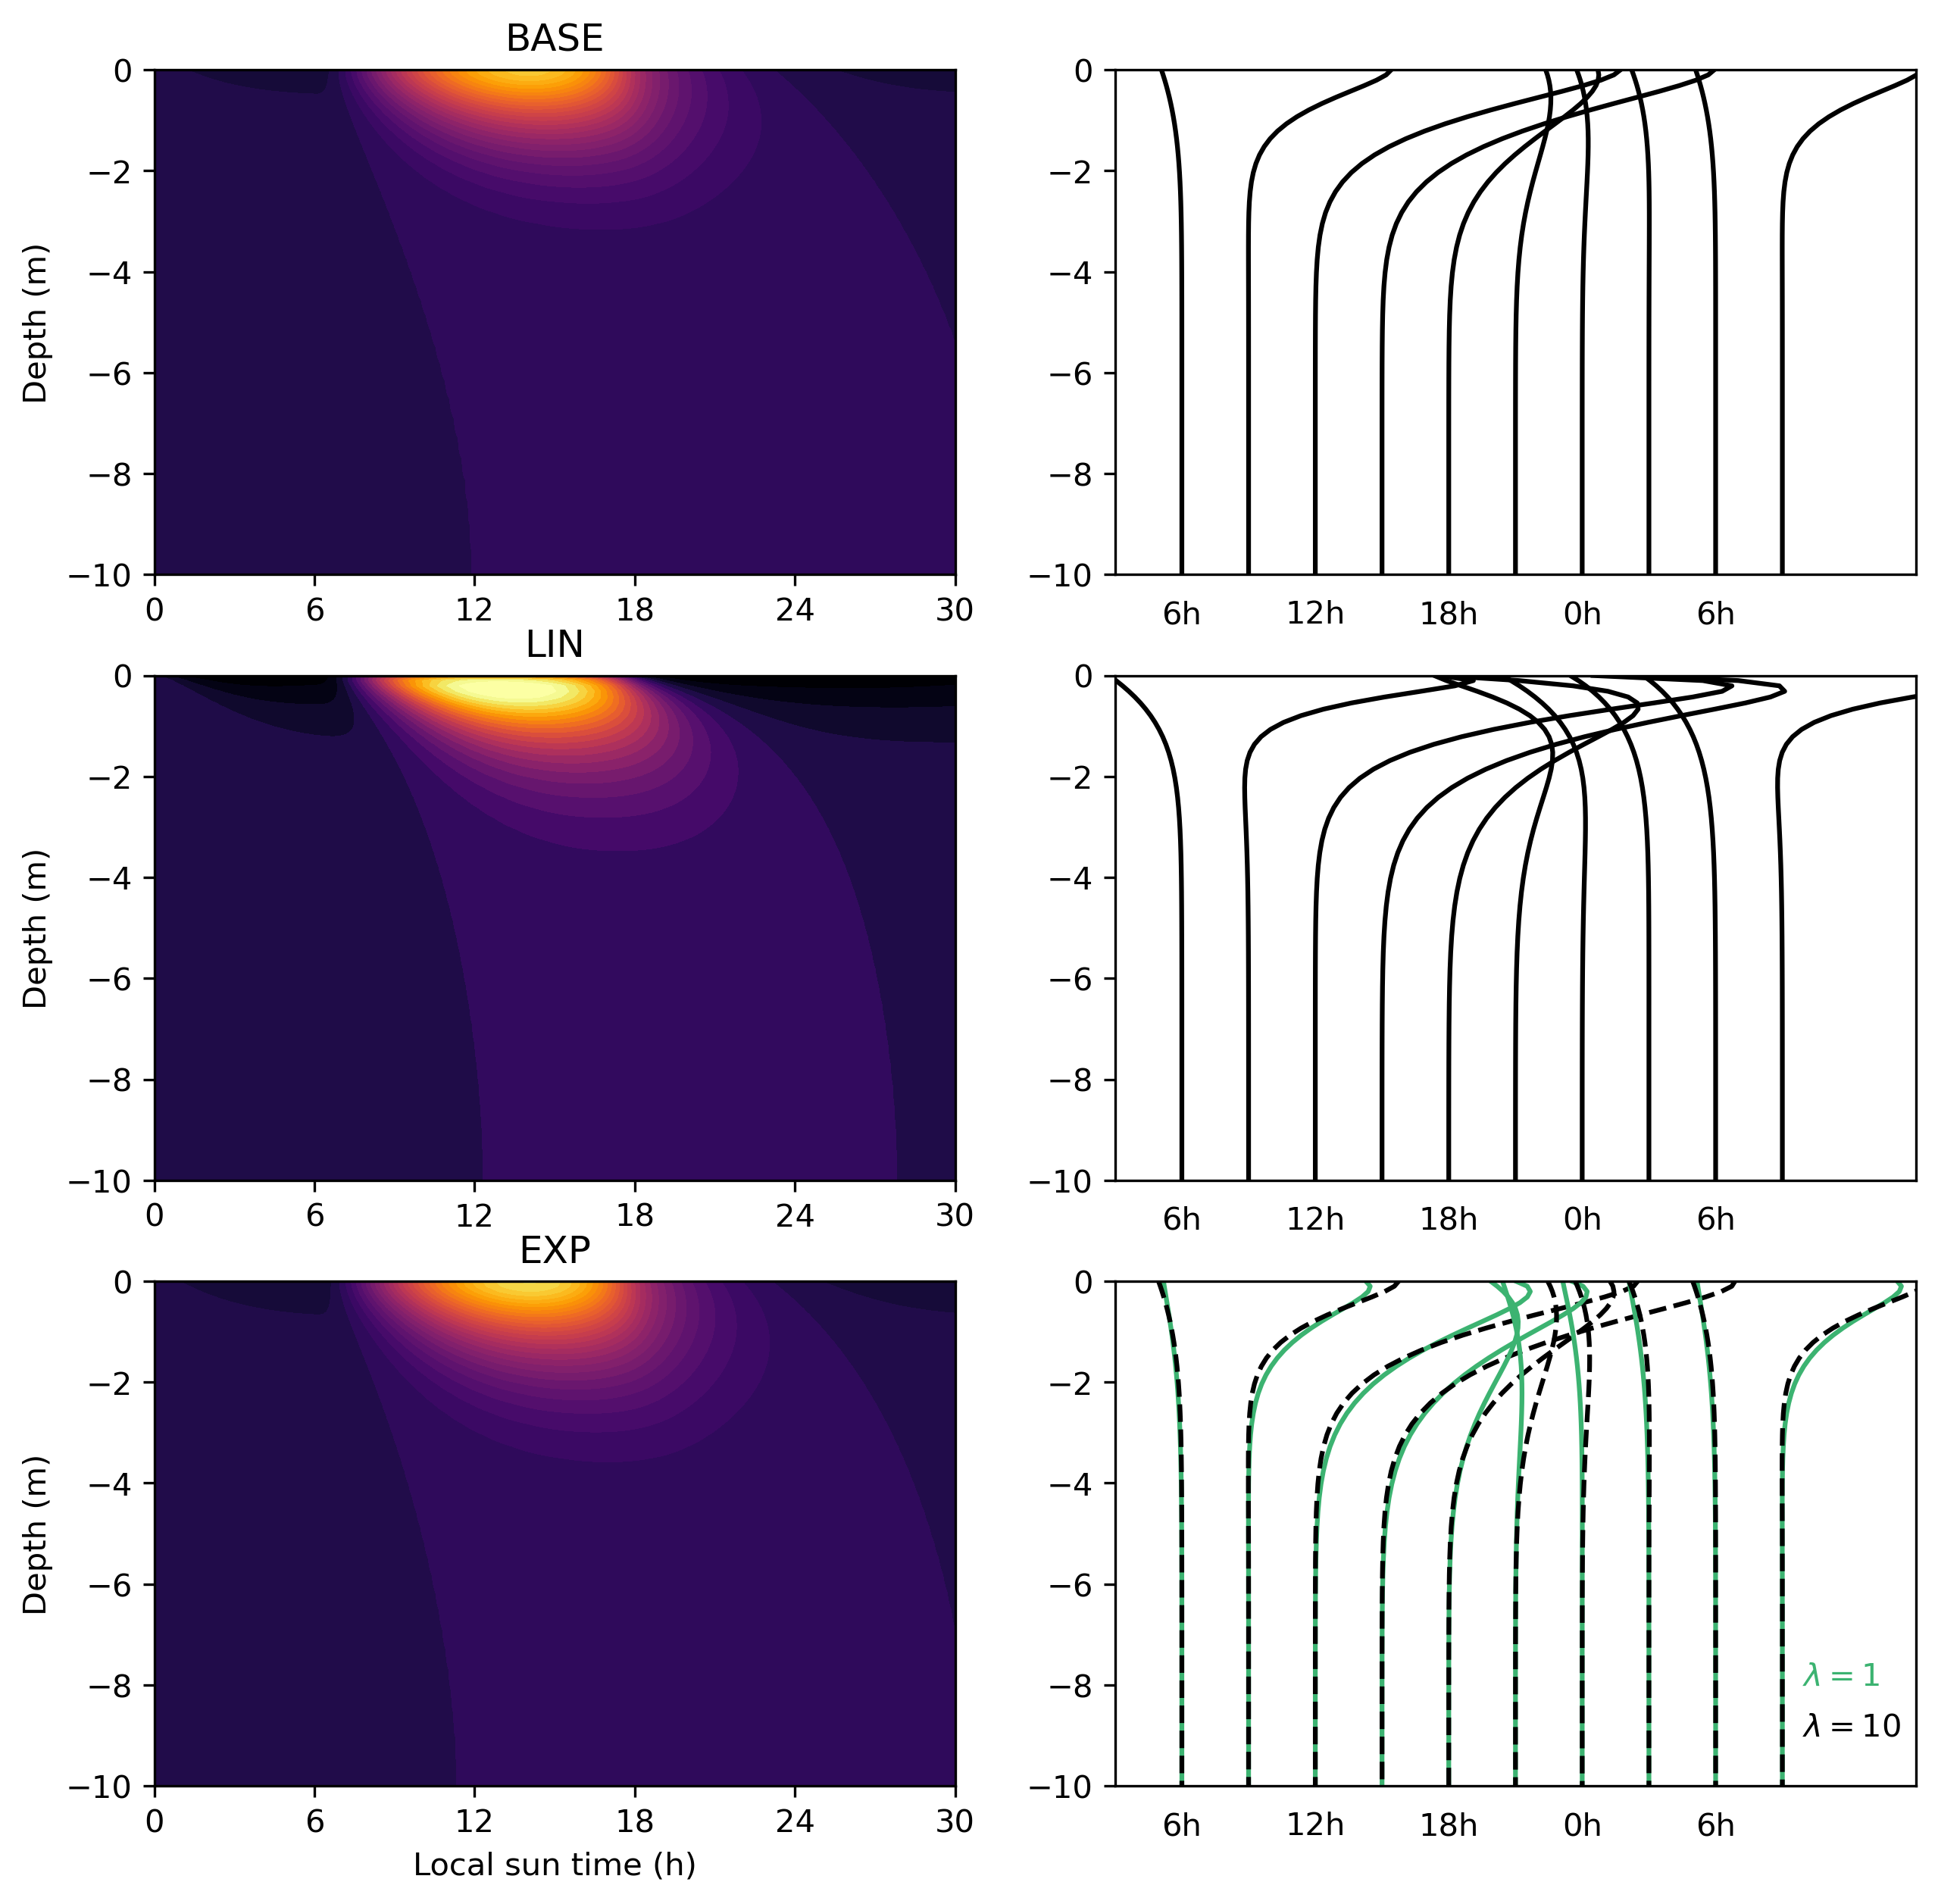

In [52]:
fig, ax = plt.subplots(3,2,dpi=300,figsize=(10,10))
ax[0,0].contourf(A[2]/86400*24,A[1],A[0].transpose()-300,cmap='inferno',levels=30,vmin=-0.5,vmax=3)
ax[1,0].contourf(B[2]/86400*24,B[1],B[0].transpose()-300,cmap='inferno',levels=30,vmin=-0.5,vmax=3)
ax[2,0].contourf(D[2]/86400*24,D[1],D[0].transpose()-300,cmap='inferno',levels=30,vmin=-0.5,vmax=3)

for i in range(2,12):
    hour = int(len(A[2])/48)*i*3
    ax[0,1].plot(A[0][hour]+0.5*i-300,A[1],c='k')
    if i%2 == 0:
        ax[0,1].text(0.5*i,-10.5,str(3*i%24)+'h',ha='center',va='top')

    hour = int(len(B[2])/48)*i*3
    ax[1,1].plot(B[0][hour]+0.5*i-300,B[1],c='k')
    if i%2==0:
        ax[1,1].text(0.5*i,-10.5,str(3*i%24)+'h',ha='center',va='top')
    
    hour = int(len(C[2])/48)*i*3
    ax[2,1].plot(C[0][hour]+0.5*i-300,C[1],c='mediumseagreen')
    if i%2==0:
        ax[2,1].text(0.5*i,-10.5,str(3*i%24)+'h',ha='center',va='top')
        
    hour = int(len(D[2])/48)*i*3
    ax[2,1].plot(D[0][hour]+0.5*i-300,D[1],'--',c='k')

titles = ['BASE','LIN','EXP']
    
for i in range(3):
    ax[i,0].set(xlim=(0,24+6),xticks=np.arange(0,36,6),ylim=(-10,0))
    ax[i,1].set(ylim=(-10,0))
    ax[i,1].set(xticks=[])
    ax[i,0].set(title=titles[i])
    ax[i,1].set(xlim=(0.5,6.5))
    ax[i,0].set(ylabel='Depth (m)')
    
ax[2,1].text(5.65,-8,r'$\lambda=1$',c='mediumseagreen')
ax[2,1].text(5.65,-9,r'$\lambda=10$',c='k')

ax[2,0].set(xlabel='Local sun time (h)')
#ax[2,1].text(1,-12,'Time (h) ; Temperature (K)')

#plt.savefig('../../Masterarbeit/thesis/figs/baselinexp-comparison.png',bbox_inches='tight')

NameError: name 'Akappas' is not defined

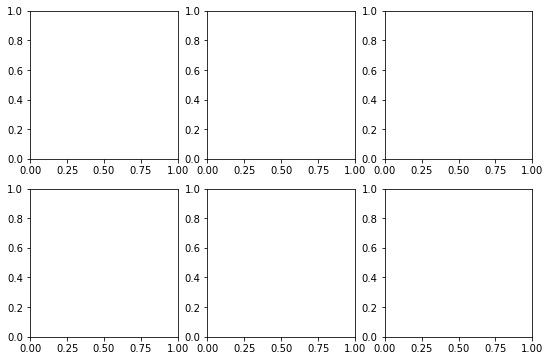

In [26]:
cols = matplotlib.cm.jet(np.linspace(0,1,6))
fig, ax = plt.subplots(2,3,figsize=(9,6))
for i in range(len(Akappas)):
    ax[0,0].plot(Akappa[i][2]/86400,Akappa[i][0][:,0]-300,c=cols[i])
    ax[0,1].plot(Amu[i][2]/86400,Amu[i][0][:,0]-300,c=cols[i])
    ax[0,2].plot(Aalpha[i][2]/86400,Aalpha[i][0][:,0]-300,c=cols[i])
    
    noon = int(len(Akappa[i][2])/48)*14
    am2 = int(len(Akappa[i][2])/48)*2
    ax[1,0].plot(Akappa[i][0][noon]+0.5,Akappa[i][1],c=cols[i], label=str(Akappas[i]))
    ax[1,0].plot(Akappa[i][0][am2],Akappa[i][1],c=cols[i])
    
    noon = int(len(Amu[i][2])/48)*14
    am2 = int(len(Amu[i][2])/48)*2
    ax[1,1].plot(Amu[i][0][noon]+0.5,Amu[i][1],c=cols[i], label=str(Amus[i]))
    ax[1,1].plot(Amu[i][0][am2],Amu[i][1],c=cols[i])
    
    noon = int(len(Aalpha[i][2])/48)*14
    am2 = int(len(Aalpha[i][2])/48)*2
    ax[1,2].plot(Aalpha[i][0][noon]+0.5,Aalpha[i][1],c=cols[i], label=str(Aalphas[i]))
    ax[1,2].plot(Aalpha[i][0][am2],Aalpha[i][1],c=cols[i])

ax[1,0].legend(fontsize=8)
ax[1,1].legend(fontsize=8)
ax[1,2].legend(fontsize=8)

titles=[r'Diffusivity $\tilde \kappa$',r'Mixing coeff. $\mu$',r'Attenuation coeff. $\alpha$']
for i in range(3):
    ax[0,i].set(xlabel='Local sun time (h)',xticks=np.arange(0,2.25,0.25),xticklabels=np.arange(0,48+6,6))
    ax[1,i].set(xlabel='Temperature (K)')
    ax[0,i].set_title(titles[i])
ax[0,0].set(ylabel=r'$\Delta$SST (K)')
ax[1,0].set(ylabel='Depth (m)')

fig.tight_layout()

#plt.savefig('../../Masterarbeit/thesis/figs/EXP_sensitivity.pdf',bbox_inches='tight')

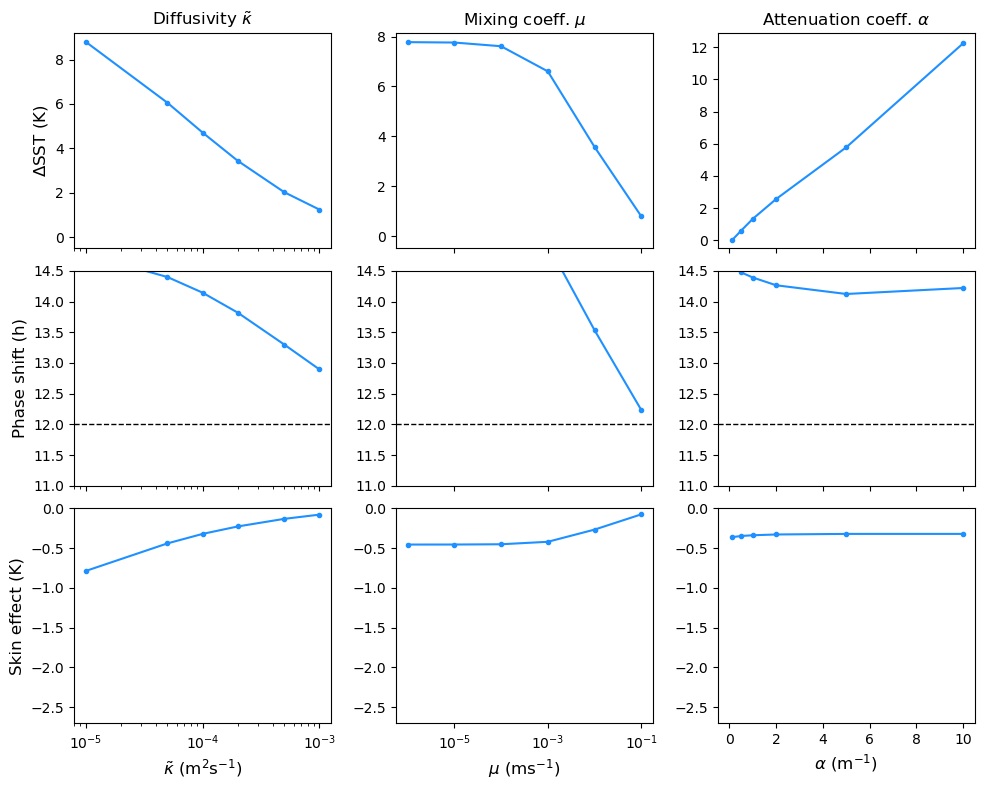

In [14]:
fig, ax = plt.subplots(3,3,dpi=100,figsize=(10,8))
ax[0,0].semilogx(Akappas,Akappamax,'.-', c='dodgerblue')
ax[1,0].semilogx(Akappas,np.array(Akappashift)%24,'.-', c='dodgerblue')
ax[2,0].semilogx(Akappas,Akappaskin,'.-', c='dodgerblue')

ax[0,1].semilogx(Amus,Amumax,'.-', c='dodgerblue')
ax[1,1].semilogx(Amus,np.array(Amushift)%24,'.-', c='dodgerblue')
ax[2,1].semilogx(Amus,Amuskin,'.-', c='dodgerblue')

ax[0,2].plot(Aalphas,Aalphamax,'.-', c='dodgerblue')
ax[1,2].plot(np.array(Aalphas)[np.array(Aalphashift)>0],np.array(Aalphashift)[np.array(Aalphashift)>0]%24,'.-', c='dodgerblue')
ax[2,2].plot(Aalphas,Aalphaskin,'.-', c='dodgerblue')

titles=[r'Diffusivity $\tilde \kappa$',r'Mixing coeff. $\mu$',r'Attenuation coeff. $\alpha$']
xlabels=[r'$\tilde \kappa$ (m$^2$s$^{-1}$)',r'$\mu$ (ms$^{-1}$)',r'$\alpha$ (m$^{-1}$)']
ylabels=[r'$\Delta$SST (K)', 'Phase shift (h)', 'Skin effect (K)']
for i in range(3):
    ax[0,i].set_title(titles[i],fontsize=12)
    ax[2,i].set_xlabel(xlabels[i],fontsize=12)
    ax[i,0].set_ylabel(ylabels[i],fontsize=12)
    ax[0,i].set(ylim=(-0.5,None))
    ax[1,i].set(ylim=(11.,14.5))
    ax[1,i].axhline(y=12,lw=1,ls='--',c='k')
    ax[2,i].set(ylim=(-2.7,0))
    ax[0,i].set(xticklabels=[])
    ax[1,i].set(xticklabels=[])
    ax[i,2].set(xlim=(-0.5,10.5))

fig.tight_layout(h_pad=0.6)

#plt.savefig('../../Masterarbeit/thesis/figs/EXP_sensitivity_stats.pdf',bbox_inches='tight')

In [ ]:
for i in range(6):
    print(Aalphashift)